In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers # type: ignore
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import MobileNetV2 # type: ignore
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input # type: ignore
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.applications import Xception # type: ignore
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Lambda # type: ignore
from tensorflow.keras.models import Model # type: ignore
from tensorflow.keras.metrics import MeanIoU, AUC # type: ignore

import warnings
warnings.filterwarnings("ignore")

In [3]:
DIR = 'D:\Project\ML\datasetoffish\Fish_Dataset\Fish_Dataset'
classes = [i for i in os.listdir(DIR) if '.' not in i]
classes

['Black Sea Sprat',
 'Gilt-Head Bream',
 'Hourse Mackerel',
 'Red Mullet',
 'Red Sea Bream',
 'Sea Bass',
 'Shrimp',
 'Striped Red Mullet',
 'Trout']

In [4]:
label = []
path = []

for dirname, _,filenames in os.walk(DIR):                    
    for filename in filenames:                                 
        if os.path.splitext(filename)[-1]=='.png':              
            if dirname.split()[-1]!='GT':                       
                label.append(os.path.split(dirname)[-1])         
                path.append(os.path.join(dirname,filename))     

df = pd.DataFrame(columns=['path','label'])
df['path']=path
df['label']=label

In [5]:
df.head()

,path,label
0,D:\Project\ML\datasetoffish\Fish_Dataset\Fish_...,Black Sea Sprat
1,D:\Project\ML\datasetoffish\Fish_Dataset\Fish_...,Black Sea Sprat
2,D:\Project\ML\datasetoffish\Fish_Dataset\Fish_...,Black Sea Sprat
3,D:\Project\ML\datasetoffish\Fish_Dataset\Fish_...,Black Sea Sprat
4,D:\Project\ML\datasetoffish\Fish_Dataset\Fish_...,Black Sea Sprat


In [6]:
df.path[0]

'D:\\Project\\ML\\datasetoffish\\Fish_Dataset\\Fish_Dataset\\Black Sea Sprat\\Black Sea Sprat\\00001.png'

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    9000 non-null   object
 1   label   9000 non-null   object
dtypes: object(2)
memory usage: 140.8+ KB


In [8]:
df['label'].value_counts()

label
Black Sea Sprat       1000
Gilt-Head Bream       1000
Hourse Mackerel       1000
Red Mullet            1000
Red Sea Bream         1000
Sea Bass              1000
Shrimp                1000
Striped Red Mullet    1000
Trout                 1000
Name: count, dtype: int64

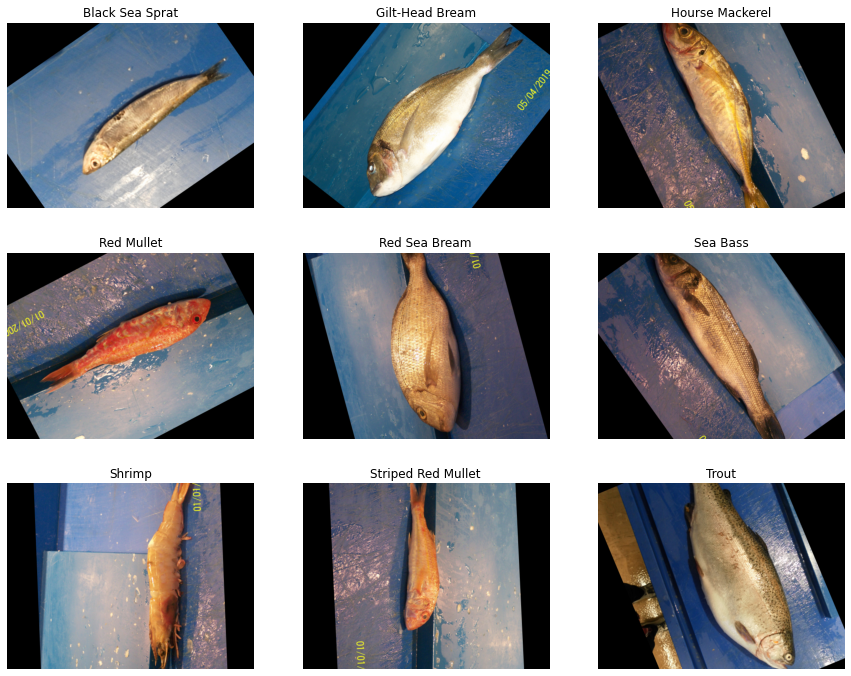

In [9]:
idx = 0
plt.figure(figsize=(15,12))
for unique_label in df['label'].unique():
    plt.subplot(3, 3, idx+1)
    plt.imshow(plt.imread(df[df['label']==unique_label].iloc[0,0]))
    plt.title(unique_label)
    plt.axis('off')
    idx+=1

In [10]:
train_df, test_df = train_test_split(df, train_size=0.8, shuffle=True, random_state=42)
val = 0.445

In [11]:
print(train_df.shape)
print(test_df.shape)

(7200, 2)
(1800, 2)


In [12]:
train_generator = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

train_images = train_generator.flow_from_dataframe(dataframe=train_df, x_col='path', y_col='label', target_size=(224, 224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=True, seed=42, subset='training')
val_images = train_generator.flow_from_dataframe(dataframe=train_df, x_col='path', y_col='label', target_size=(224, 224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=True, seed=42, subset='validation' )
test_images = test_generator.flow_from_dataframe(dataframe=test_df, x_col='path', y_col='label', target_size=(224, 224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=False)

Found 5760 validated image filenames belonging to 9 classes.
Found 1440 validated image filenames belonging to 9 classes.
Found 1800 validated image filenames belonging to 9 classes.


In [13]:
display(train_images.class_indices)
display(val_images.class_indices)
display(test_images.class_indices)

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


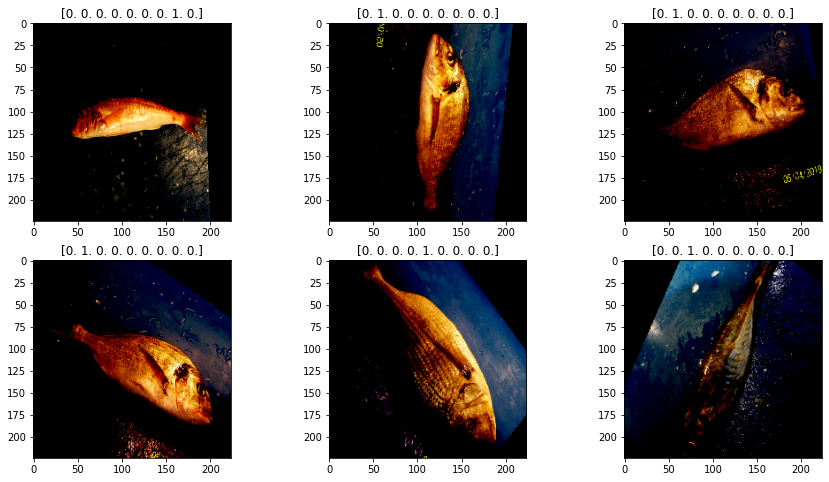

In [14]:
fit, ax= plt.subplots(nrows=2, ncols=3, figsize=(15,8))
ax=ax.flatten()
j=0
for _ in range(6):
    img, label = test_images.next()
    ax[j].imshow(img[0],)
    ax[j].set_title(label[0])
    j=j+1

In [15]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

In [16]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(9, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(train_images,
                    validation_data=val_images,
                    epochs=3)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [17]:
results = model.evaluate(test_images, verbose=0)
print("Test Loss: {:.5f}".format(results[0]))
# format((results[1]))

Test Loss: 0.00435


In [18]:
pred = model.predict(test_images)
pred=np.argmax(pred,axis=1)
pred_df=test_df.copy()
labels={}
for l,v in test_images.class_indices.items():
    labels.update({v:l})
pred_df['pred']=pred
pred_df['pred']=pred_df['pred'].apply(lambda x: labels[x])

pred_df=pred_df.reset_index(drop=True)
pred_df.head(10)

57/57 [==============================] - 54s 898ms/step


,path,label,pred
0,D:\Project\ML\datasetoffish\Fish_Dataset\Fish_...,Striped Red Mullet,Striped Red Mullet
1,D:\Project\ML\datasetoffish\Fish_Dataset\Fish_...,Gilt-Head Bream,Gilt-Head Bream
2,D:\Project\ML\datasetoffish\Fish_Dataset\Fish_...,Black Sea Sprat,Black Sea Sprat
3,D:\Project\ML\datasetoffish\Fish_Dataset\Fish_...,Red Sea Bream,Red Sea Bream
4,D:\Project\ML\datasetoffish\Fish_Dataset\Fish_...,Trout,Trout
5,D:\Project\ML\datasetoffish\Fish_Dataset\Fish_...,Trout,Trout
6,D:\Project\ML\datasetoffish\Fish_Dataset\Fish_...,Sea Bass,Sea Bass
7,D:\Project\ML\datasetoffish\Fish_Dataset\Fish_...,Trout,Trout
8,D:\Project\ML\datasetoffish\Fish_Dataset\Fish_...,Red Mullet,Red Mullet
9,D:\Project\ML\datasetoffish\Fish_Dataset\Fish_...,Red Sea Bream,Red Sea Bream


campare with ml modals

In [19]:
# from sklearn import svm
# from sklearn.metrics import accuracy_score

# # Assuming train_df and test_df contain your training and testing data
# # Assuming train_labels and test_labels contain the labels for training and testing data respectively

# # Create an SVM classifier
# svm_classifier = svm.SVC(kernel='linear')  # Using linear kernel for simplicity, you can choose other kernels as well

# # Train the SVM classifier
# train_labels = train_images.labels
# test_labels = test_images.labels
# svm_classifier.fit(train_df, train_labels)

# # Predict the labels for the test set
# test_predictions = svm_classifier.predict(test_df)

# # Calculate the accuracy of the model
# accuracy = accuracy_score(test_labels, test_predictions)
# print("Accuracy:", accuracy)

Accuracy Score: 0.9988888888888889


<AxesSubplot:>

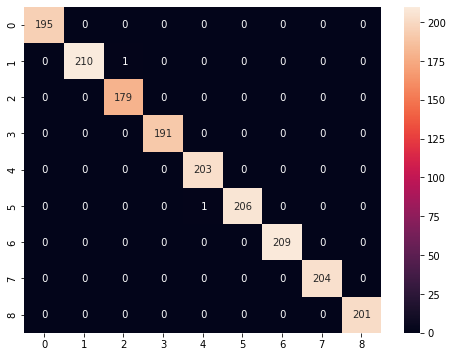

In [20]:
print(f"Accuracy Score: {accuracy_score(pred_df['label'],pred_df['pred'])}")
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(pred_df['label'],pred_df['pred']), annot=True, fmt='2d')

In [21]:
print(classification_report(pred_df['label'],pred_df['pred']))

                    precision    recall  f1-score   support

   Black Sea Sprat       1.00      1.00      1.00       195
   Gilt-Head Bream       1.00      1.00      1.00       211
   Hourse Mackerel       0.99      1.00      1.00       179
        Red Mullet       1.00      1.00      1.00       191
     Red Sea Bream       1.00      1.00      1.00       203
          Sea Bass       1.00      1.00      1.00       207
            Shrimp       1.00      1.00      1.00       209
Striped Red Mullet       1.00      1.00      1.00       204
             Trout       1.00      1.00      1.00       201

          accuracy                           1.00      1800
         macro avg       1.00      1.00      1.00      1800
      weighted avg       1.00      1.00      1.00      1800

